<a target="_blank" href="https://colab.research.google.com/github/giordamaug/WisardLib4Python/blob/main/test_classifier.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Installation

In [ ]:
!git clone https://github.com/giordamaug/WisardLib4Python.git
%cd WisardLib4Python
!pip install pybind11
!python setup.py build_ext --inplace 

## Load the dataset

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
from sklearn import preprocessing
target = "species"
X = np.array(df.drop(target, axis=1))
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df[target]))
classes = le.classes_

## Cross validation

5-fold Cross Validation...
--- 0.012710332870483398 seconds ---
WiSARDClassifier(n_tics: 512, n_bits:, 16)

ACC 0.9533 MCC 0.9301


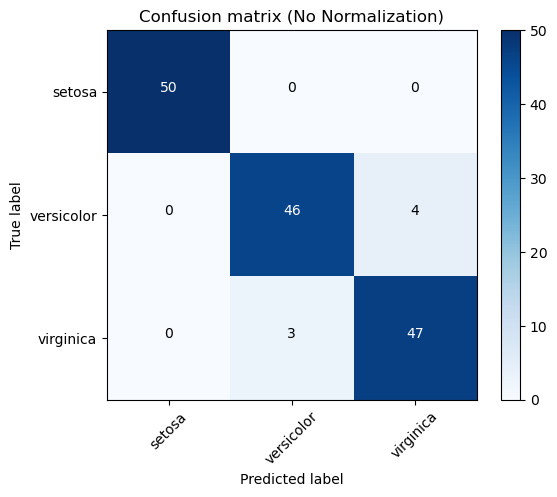

In [3]:
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_predict
from sklearnapi import WiSARDClassifier
from utilities import plot_confusion_matrix
import matplotlib.pyplot as plt
import time 
clf = WiSARDClassifier(n_bits=16, n_tics=512, 
                       random_state=0, code='t', debug=False)
start = time.time()
folds = 5
print(f"{folds}-fold Cross Validation...")
y_pred = cross_val_predict(clf, X, y, cv=folds)
targets = y
print("--- %s seconds ---" % (time.time() - start))
print(f'{clf}')
print(f"ACC {metrics.accuracy_score(targets, y_pred):.4f} MCC {metrics.matthews_corrcoef(targets, y_pred):.4f}")
cm = metrics.confusion_matrix(targets, y_pred)
plt.figure()
plot_confusion_matrix(cm, classes=classes,title='Confusion matrix')
plt.show()
